In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf

In [2]:
file_list = ['../galaxy_spectra/LRIS_data/J0659/szfpr181003_0062r.fits',
             '../galaxy_spectra/LRIS_data/J0659/szfpr181003_0063r.fits']

In [4]:
## create var file
#var_2d = np.ones((555, 4096))
#pf.PrimaryHDU(var_2d).writeto('var_2d_with_ones.fits')

In [28]:
vr = pf.open(file_list[0])
vr[0].header

SIMPLE  =                    T / Written by IDL:  Mon Aug 31 22:12:19 2020      
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 /                                                
NAXIS2  =                  555 /                                                
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =              0.00000 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2018-10-03T15:01:31' /                                               
EXPTIME =        599.999572750 / Exposure time (sec)                            
OBSERVAT= 'Keck    '           / Observatory                                    
TELESCOP= 'Keck I  '           / Telescope name                                 
INSTRUME= 'LRIS    '        

In [3]:
spec1 = spec2d.Spec2d(file_list[0], hext=0, invar='var_2d_with_ones.fits', ytrim=[50, 170])
spec2 = spec2d.Spec2d(file_list[1], hext=0,  invar='var_2d_with_ones.fits', ytrim=[50, 170])


Loading file ../galaxy_spectra/LRIS_data/J0659/szfpr181003_0062r.fits
-----------------------------------------------

Loading file var_2d_with_ones.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/J0659/szfpr181003_0062r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 50:171
Final data dimensions (x y): 4096 x 121

Dispersion axis:              x
N_pixels along dispersion axis: 4096


Loading file ../galaxy_spectra/LRIS_data/J0659/szfpr181003_0063r.fits
-----------------------------------------------

Loading file var_2d_with_ones.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_data/J0659/szfpr181003_0063r.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 50:171
Final data dimensions (x y): 4096 x 121

Dispersion axis:              x
N_pixels along dispersion axis: 4096



Profile max value (before normalization) 275.769592


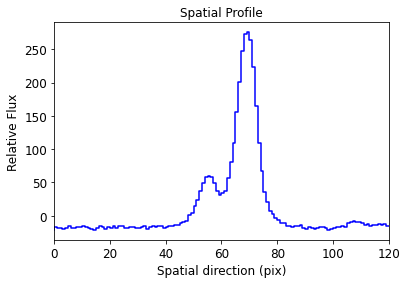


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -14

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 15, 60, 2

amplitude=15.000000, mu=60.000000, sigma=2.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 270, 70, 3, 4

amplitude=270.000000, x_0=70.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 53, 55, 3, 4

amplitude=53.000000, x_0=55.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3

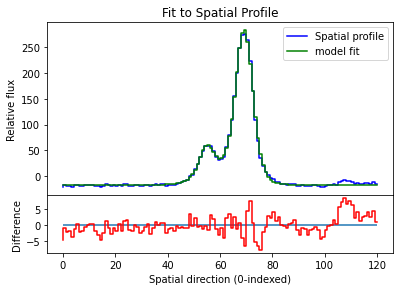

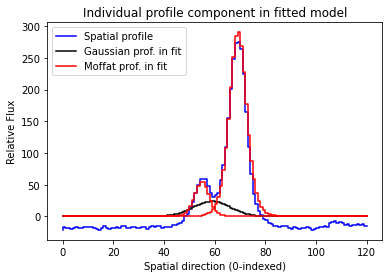


Do you want to start over ? : type yes/no
no


In [5]:
spec1.spatial_profile(pixrange=[2100, 2300])
plt.show()
mod0 = spec1.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-16.44766401)>

    [1]: <Gaussian1D(amplitude=23.79644132, mean=59.44082468, stddev=7.35225553)>

    [2]: <Moffat1D(amplitude=291.46077481, x_0=69.73378588, gamma=9.24183928, alpha=4.2592598)>

    [3]: <Moffat1D(amplitude=55.01934795, x_0=55.40356417, gamma=8.78814329, alpha=5.45251003)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3           alpha_3     
    ------------------ ----------------- ... ----------------- -----------------
    -16.44766401153129 23.79644131882817 ... 8.788143292284337 5.452510026863993

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-16.33677566)>

    [1]: <Gaussian1D(amplitude=26.70284611

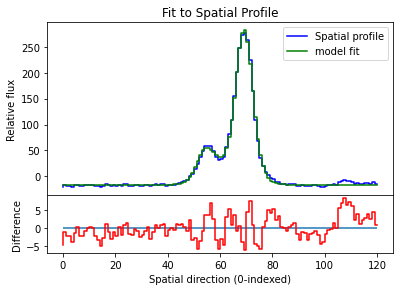

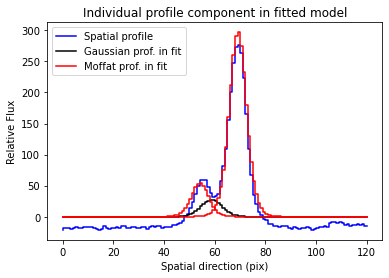

<CompoundModel(c0_0=-16.33677566, amplitude_1=26.70284611, mean_1=59.19902816, stddev_1=4.29913573, amplitude_2=298.33275993, x_0_2=69.69902816, gamma_2=10.56444601, alpha_2=5.40068576, amplitude_3=54.15904142, x_0_3=54.69902816, gamma_3=10.56444601, alpha_3=5.40068576)>

In [9]:
def tie_pos1_moffat(model):
     return model.x_0_2 - 10
            
def tie_pos2_moffat(model):
    return model.x_0_2 - 15

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

#for sp in spec_list:
#spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec1.mod0[1].mean.tied = tie_pos1_moffat
spec1.mod0[3].x_0.tied = tie_pos2_moffat
#spec1.mod0[2].gamma.tied = tie_gamma_moffat
#spec1.mod0[2].alpha.tied = tie_alpha_moffat
spec1.mod0[3].gamma.tied = tie_gamma_moffat
spec1.mod0[3].alpha.tied = tie_alpha_moffat
spec1.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 2 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 2 to parameter: gamma_2
Fitting polynomial of degree 2 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 2 to parameter: gamma_3
Fitting polynomial of degree 2 to parameter: alpha_3


<IPython.core.display.Javascript object>


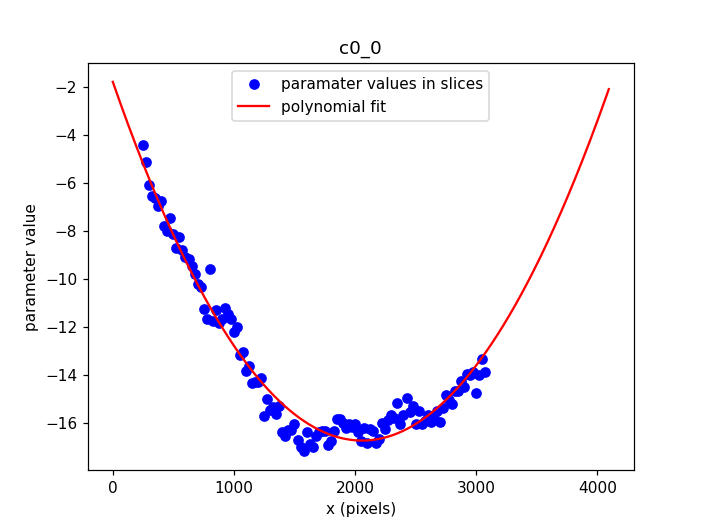

<IPython.core.display.Javascript object>


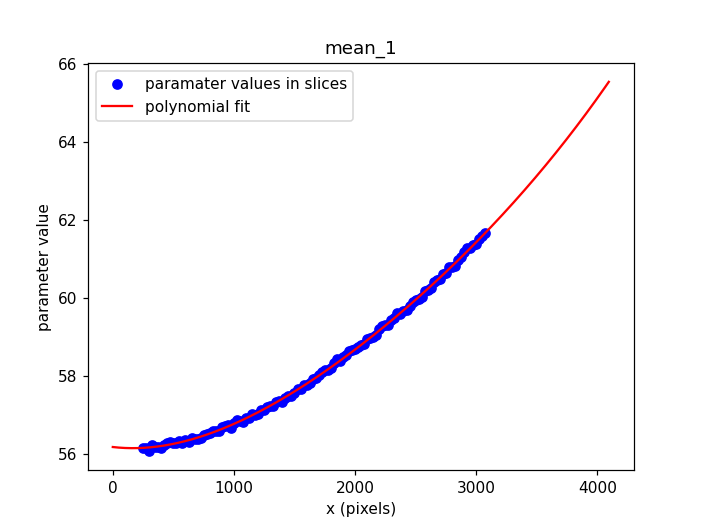

<IPython.core.display.Javascript object>


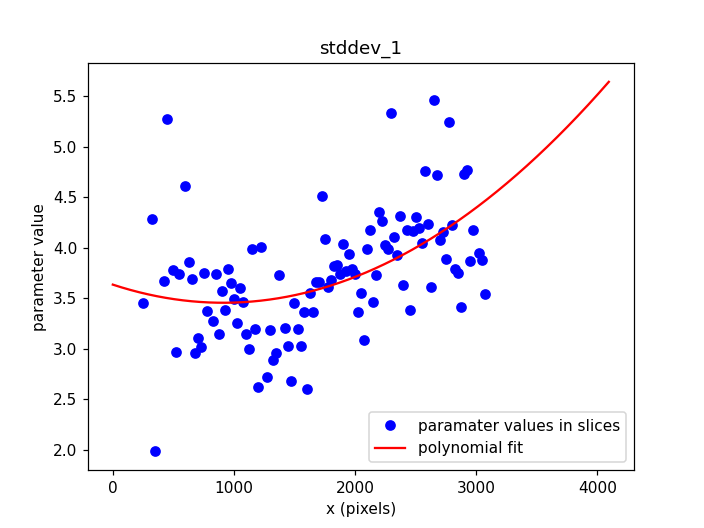

<IPython.core.display.Javascript object>


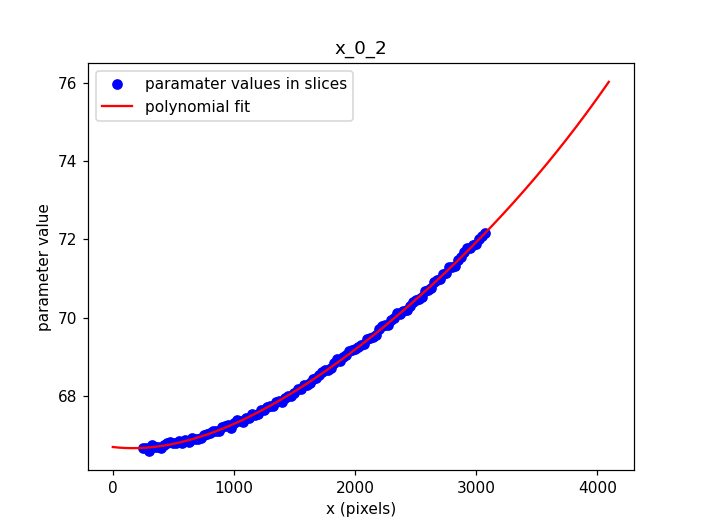

<IPython.core.display.Javascript object>


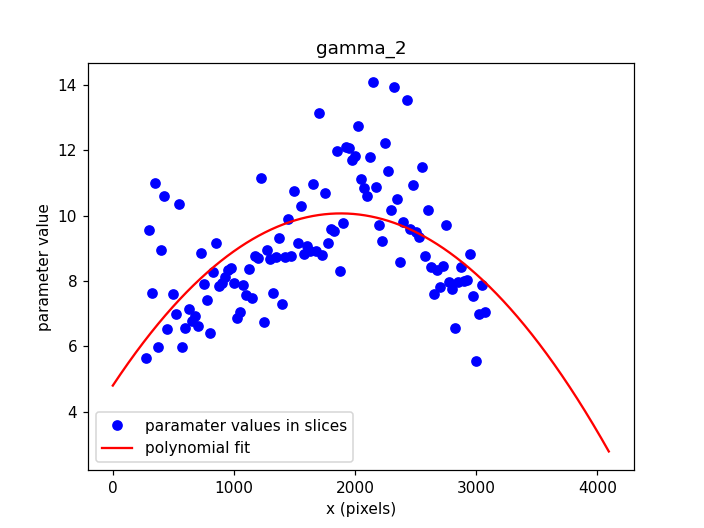

<IPython.core.display.Javascript object>


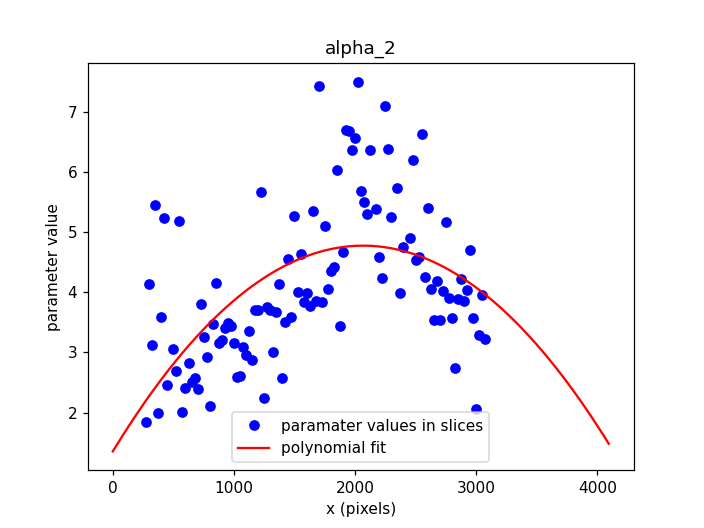

<IPython.core.display.Javascript object>


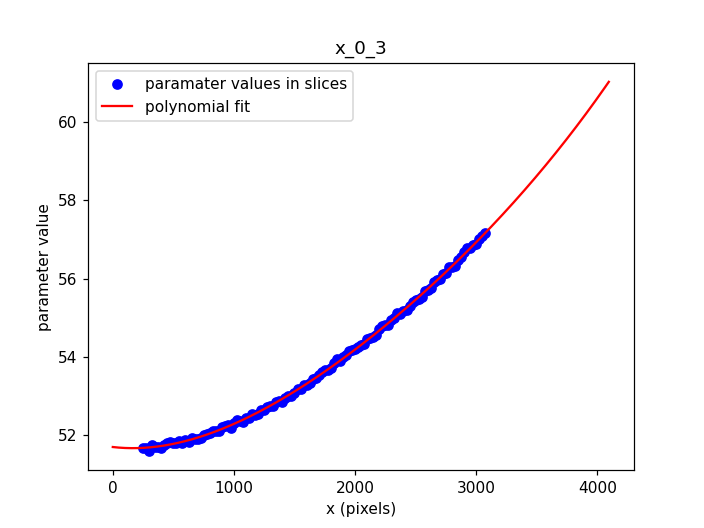

<IPython.core.display.Javascript object>


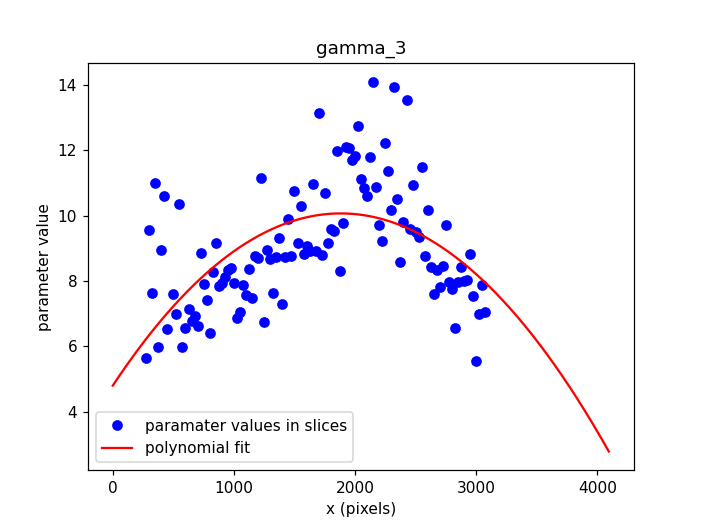

<IPython.core.display.Javascript object>


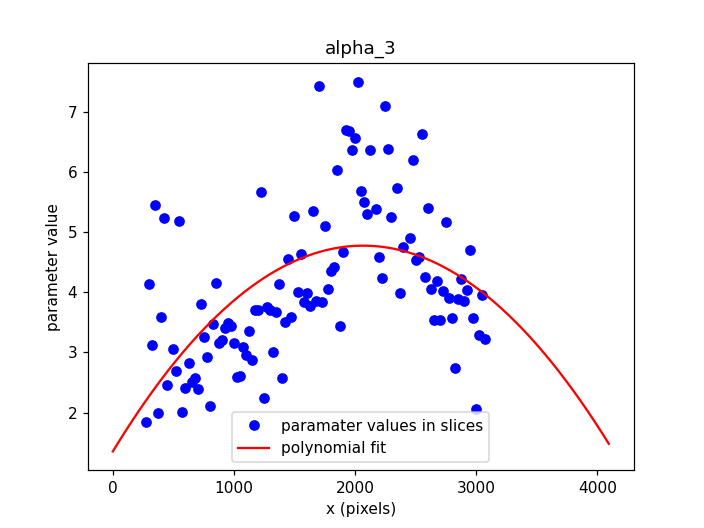

In [19]:
spec1.find_and_trace(spec1.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'mean_1':4},
                    fitrange=[250, 3100], polyorder=2)
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 250 - 3100
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5707.10
 Spectrum End:     9068.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18

 Spectrum Start:  5707.10
 Spectrum End:     9068.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18

 Spectrum Start:  5707.10
 Spectrum End:     9068.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18


Plotting the spectrum


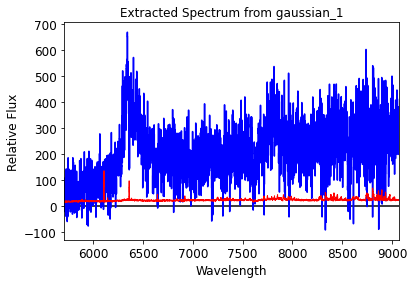

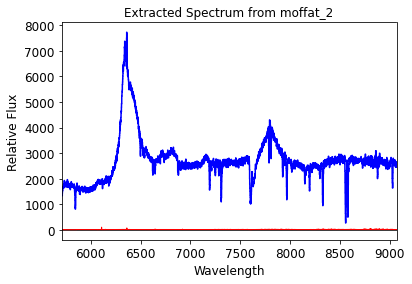

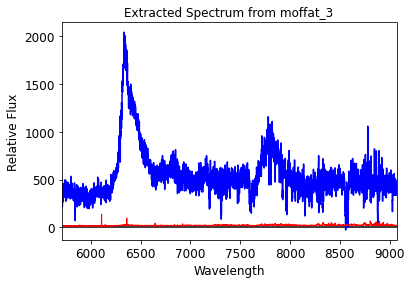

In [16]:
spec1.extract(method='modelfit', extrange=[250, 3100])
plt.show()

<IPython.core.display.Javascript object>


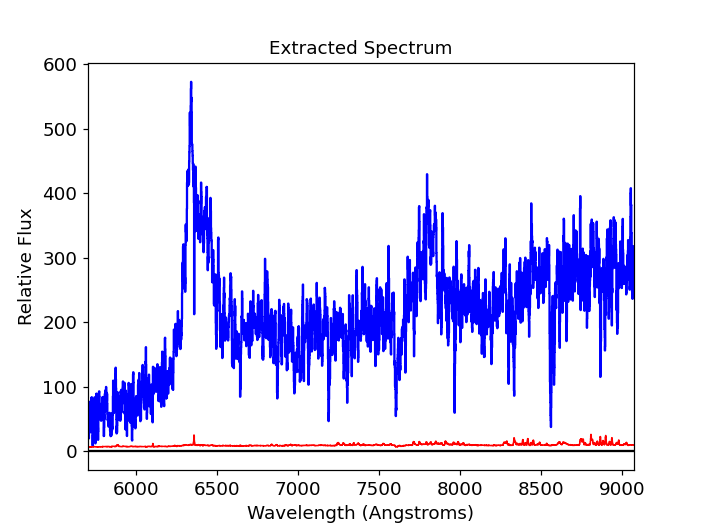

In [17]:
%matplotlib notebook
spec1.spectra[0][1].smooth(5)
#spec1.spectra[0][1].mark_lines('strongem', z=3.083, usesmooth=True)
#spec1.spectra[0][1].mark_lines('abs', z=3.083, usesmooth=True)

Profile max value (before normalization) 245.776520


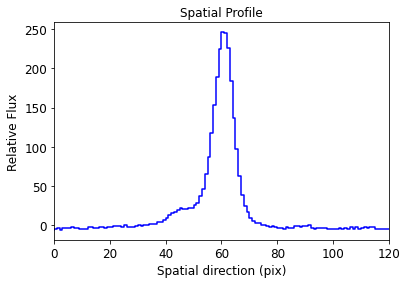


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -3

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 245, 61, 3, 4

amplitude=245.000000, x_0=61.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 30, 50, 2, 3

amplitude=30.000000, x_0=50.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 15, 46, 2, 3

amplitude=15.000000, x_0=46.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-4.05331218)>

    [1]: <Moffat1D(amplitude=242.

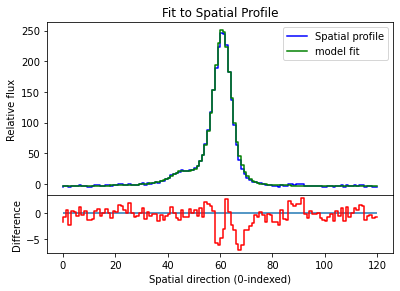

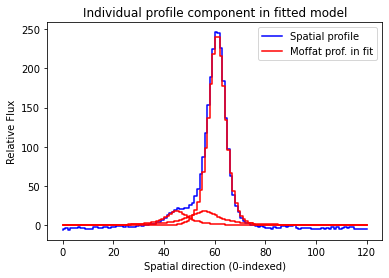


Do you want to start over ? : type yes/no
no


In [19]:
spec2.spatial_profile(pixrange=[2100, 2400])
plt.show()
mod0 = spec2.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-4.05331218)>

    [1]: <Moffat1D(amplitude=242.69207358, x_0=61.46832521, gamma=8.22546382, alpha=3.48436267)>

    [2]: <Moffat1D(amplitude=18.0908934, x_0=56.3396444, gamma=6.83000451, alpha=0.90901897)>

    [3]: <Moffat1D(amplitude=18.34604066, x_0=45.61897101, gamma=5.29591793, alpha=1.0140722)>
Parameters:
           c0_0           amplitude_1     ...      gamma_3           alpha_3     
    ------------------ ------------------ ... ----------------- -----------------
    -4.053312184368415 242.69207357966923 ... 5.295917926536953 1.014072195557425

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.44730274)>

    [1]: <Moffat1D(amplitude=

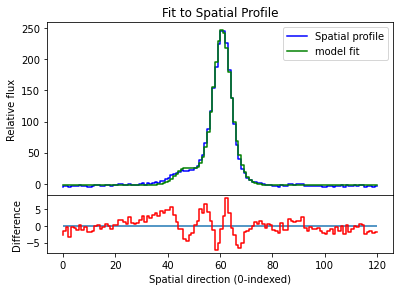

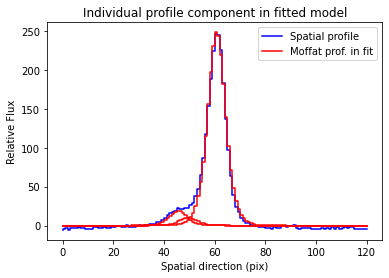

<CompoundModel(c0_0=-2.44730274, amplitude_1=249.68895053, x_0_1=61.310193, gamma_1=9.19782037, alpha_1=3.87489211, amplitude_2=10.31353482, x_0_2=50.010193, gamma_2=9.19782037, alpha_2=3.87489211, amplitude_3=18.93472664, x_0_3=46.160193, gamma_3=9.19782037, alpha_3=3.87489211)>

In [20]:
def tie_pos1_moffat(model):
     return model.x_0_1 - 11.3
            
def tie_pos2_moffat(model):
    return model.x_0_1 - 15.15

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#for sp in spec_list:
spec2.mod0[2].x_0.tied = tie_pos1_moffat
spec2.mod0[3].x_0.tied = tie_pos2_moffat
spec2.mod0[2].gamma.tied = tie_gamma_moffat
spec2.mod0[2].alpha.tied = tie_alpha_moffat
spec2.mod0[3].gamma.tied = tie_gamma_moffat
spec2.mod0[3].alpha.tied = tie_alpha_moffat
spec2.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


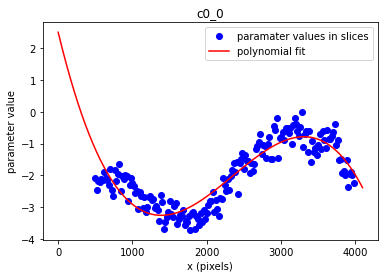

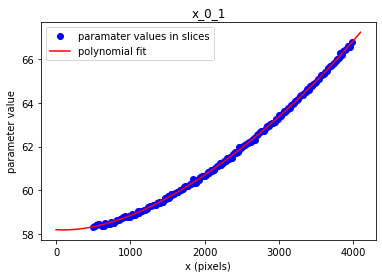

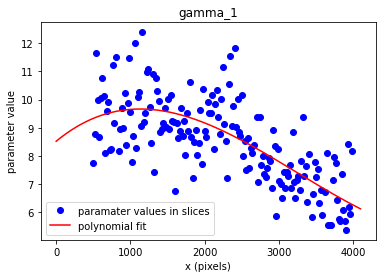

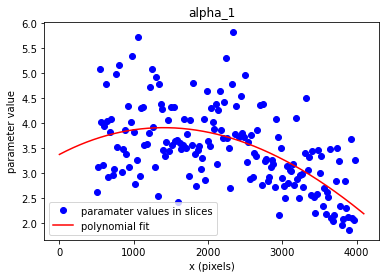

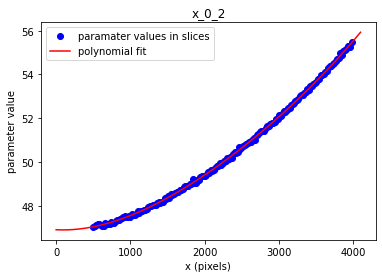

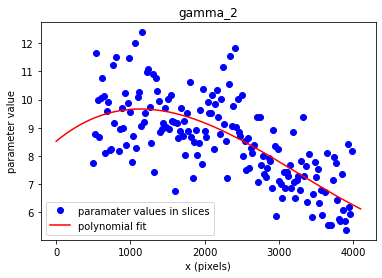

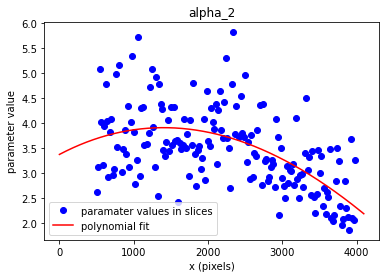

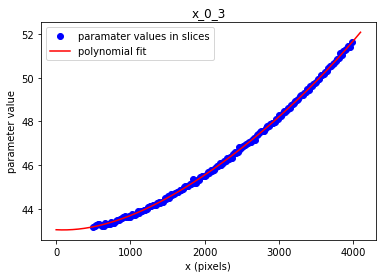

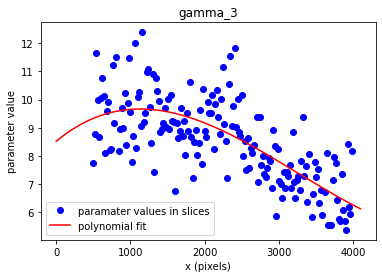

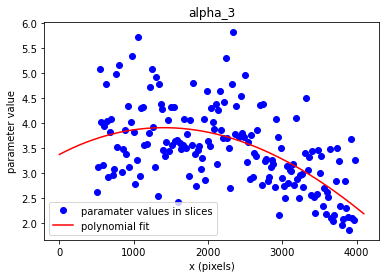

In [21]:
spec2.find_and_trace(spec2.mod0, stepsize=20, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4},
                    fitrange=[500,4000], polyorder=3)
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 500 - 4000
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  6002.10
 Spectrum End:    10130.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18

 Spectrum Start:  6002.10
 Spectrum End:    10130.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18

 Spectrum Start:  6002.10
 Spectrum End:    10130.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18


Plotting the spectrum


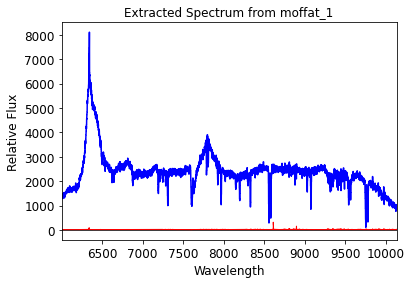

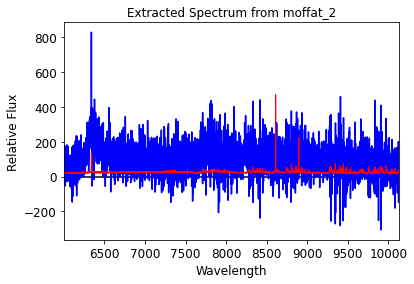

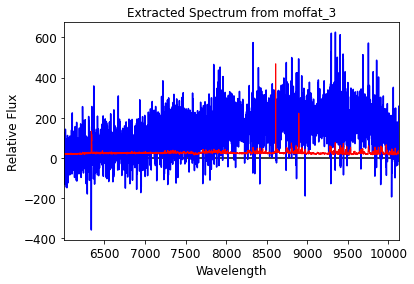

In [22]:
spec2.extract(method='modelfit', extrange=[500, 4000])
plt.show()

<IPython.core.display.Javascript object>


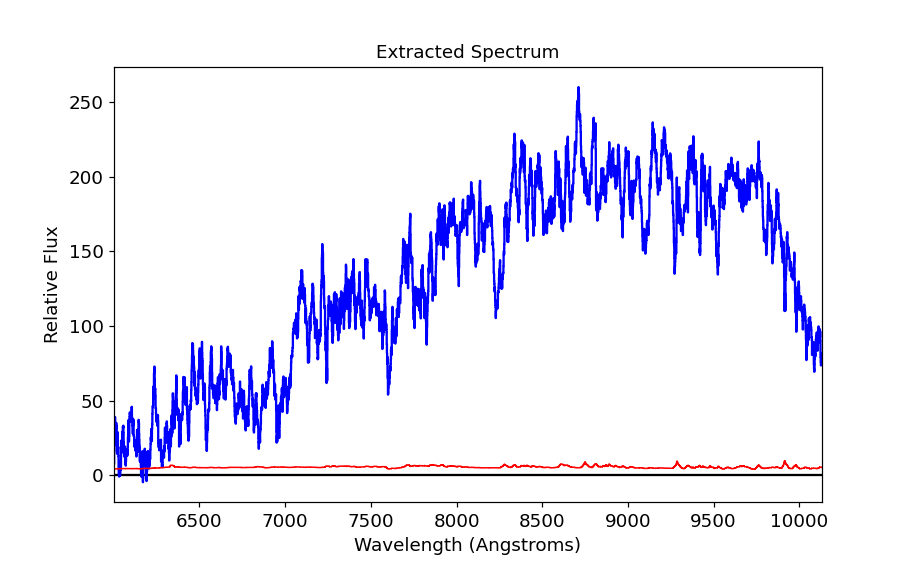

In [25]:
%matplotlib notebook
spec2.spectra[2][1].smooth(21)
#spec1.spectra[0][1].mark_lines('strongem', z=3.083, usesmooth=True)
#spec1.spectra[0][1].mark_lines('abs', z=3.083, usesmooth=True)

In [26]:
sp = spec1d.Spec1d(wav=spec2.spectra[2][1]['wav'][:2700], flux=spec2.spectra[2][1]['flux'][:2700],
                   var=spec2.spectra[2][1]['var'][:2700])

 Spectrum Start:  6002.10
 Spectrum End:     9186.92
 Dispersion (1st pixel):   1.18
 Dispersion (average):      1.18



In [27]:
resp_sp = spec1d.Spec1d('../other_spectra/response_curve_from_feige110_r12132020.txt')


Reading spectrum from ../other_spectra/response_curve_from_feige110_r12132020.txt
Expected file format: text
 Spectrum Start:  5649.45
 Spectrum End:     8924.96
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



resample: replacing input spectrum with resampled version
resample: for now not resampling the variance


<IPython.core.display.Javascript object>


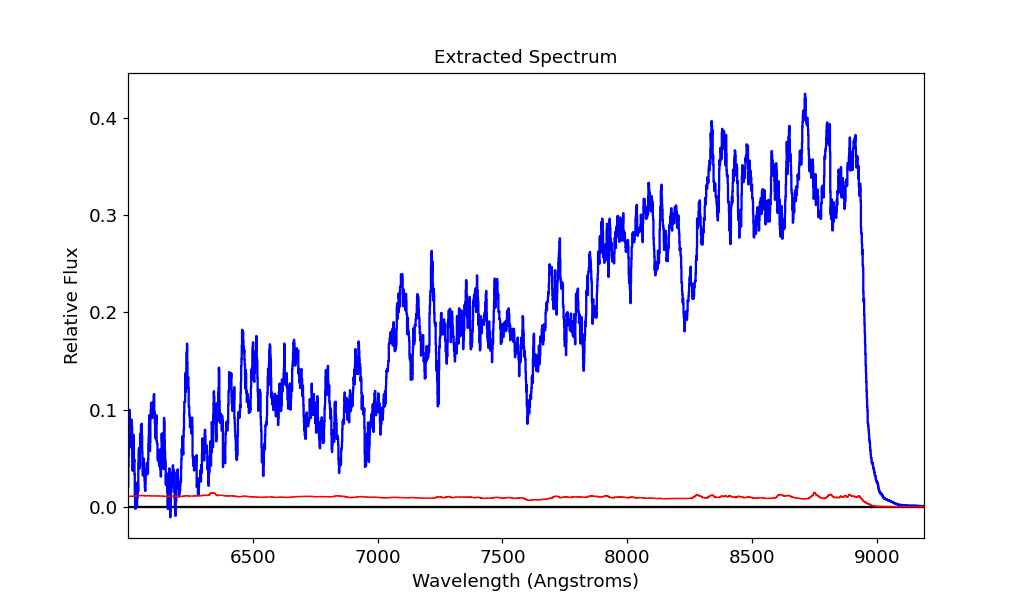

In [29]:
resp_sp.resample(owave=sp['wav'])
sp.resp_corr(resp_sp.rsflux*10**-2, action='divide')
sp.smooth(21)
plt.show()

<IPython.core.display.Javascript object>


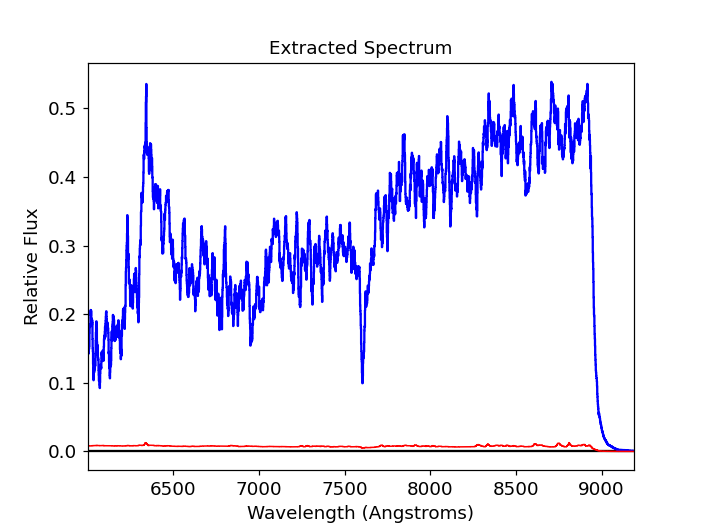

In [23]:
sp.smooth(15)